##### Import data

In [1]:
from util_copy import load_fabric_data, extract_label_grouping, extract_label_grouping, load_fabric_images
import numpy as np
from matplotlib import image

In [2]:

path = r"C:/Users/Administrator/Desktop/PRML/Project/fabric_data/label_json/**/**.json"

fids, fdata = load_fabric_data(path)
ftype1, ftype2 = extract_label_grouping(fdata)


In [4]:
path = r"C:/Users/Administrator/Desktop/PRML/Project/fabric_data/temp/"
labels, imgs = load_fabric_images(path, fids, fdata, ftype1)


C:/Users/Administrator/Desktop/PRML/Project/fabric_data/temp/**/**.jpg


In [5]:
print(len(labels))
print(imgs[0])

3371
[[[130 130 128 155 147 171]
  [139 137 138 151 150 168]
  [147 145 148 146 154 167]
  ...
  [ 57  46  24  92  87  29]
  [ 73  51  28  83  64  34]
  [124  89  69  76  47  51]]

 [[139 141 140 162 153 174]
  [143 144 146 157 155 168]
  [148 148 150 151 155 166]
  ...
  [ 69  61  38 121 124  69]
  [ 58  41  15 113 100  56]
  [ 69  39  15  88  63  33]]

 [[143 147 150 160 149 166]
  [145 149 152 156 153 162]
  [150 151 156 153 156 161]
  ...
  [102 100  75 153 160 116]
  [ 90  79  49 140 133  79]
  [ 75  55  22 126 106  47]]

 ...

 [[ 56  19  13  76  21  24]
  [ 55  16  11  77  28  31]
  [ 57  18  13  70  31  32]
  ...
  [208 213 219 210 213 206]
  [208 218 220 222 223 228]
  [200 210 211 216 213 234]]

 [[ 74  35  28 103  31  34]
  [ 69  30  23 103  37  39]
  [ 72  31  25  95  39  40]
  ...
  [191 200 209 212 212 212]
  [220 231 237 209 209 221]
  [196 210 213 213 210 237]]

 [[ 87  49  40 122  36  37]
  [ 82  42  34 123  41  43]
  [ 85  45  37 115  43  46]
  ...
  [185 193 204 214 

In [6]:
n_samples = len(imgs)
print("Number of samples:", n_samples)

Number of samples: 3371


In [7]:
print(imgs[1230].shape)

(400, 400, 6)


In [8]:
# another way of selecting categories
from numpy import array

myIndices = []
def find_indices_four_cat(listOfLabel):
    res = []
    i = 0 
    for i in range(0,len(listOfLabel)):
        if (listOfLabel[i] == 1) or (listOfLabel[i]== 2) or (listOfLabel[i] == 5) or (listOfLabel[i] == 13): 
            res.append(i)
    return res

label_four_cat_indices = find_indices_four_cat(labels)

# select the fours category out of the sample 
labels_four_cat = array(labels)[label_four_cat_indices]
samples_four_cat = array(imgs)[label_four_cat_indices]



In [9]:
labels = labels_four_cat
imgs = samples_four_cat

print(len(imgs))



1123


##### Padding
- https://blog.csdn.net/wuzqChom/article/details/74785643
- https://stackoverflow.com/questions/47697622/cnn-image-resizing-vs-padding-keeping-aspect-ratio-or-not/49882055#49882055
- https://stackoverflow.com/questions/43391205/add-padding-to-images-to-get-them-into-the-same-shape

In [10]:
import cv2

In [11]:
imgs = [cv2.resize(img,(200, 200)) for img in imgs]

##### Split data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_images, test_images, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.2, random_state=1)

##### Normalize data

In [14]:

#first split, split to the training and testing (we will futher split training later because we need validation set )
train_images, test_images, train_labels, test_labels = np.array(train_images), np.array(test_images), np.array(train_labels), np.array(test_labels)
train_images, test_images = train_images / 255.0, test_images / 255.0

In [15]:
train_images.shape
print(len(test_labels))
# note all the test labels are real images at this point. We are only going to generate fake data for the training set

225


In [16]:
# subset all the 5s 
def find_indices_5(listOfLabel):
    res = []
    i = 0 
    for i in range(0,len(listOfLabel)):
        if (listOfLabel[i] == 5): 
            res.append(i)
    return res

label_five = find_indices_5(train_labels)
print(len(label_five))

train_is_five = array(train_images)[label_five]

# the is the training data that has labelled as "5"
print(train_is_five)

13
[[[[0.14117647 0.13333333 0.13333333 0.23529412 0.18431373 0.15686275]
   [0.21960784 0.23529412 0.19607843 0.27843137 0.37647059 0.31372549]
   [0.41568627 0.45490196 0.36078431 0.56862745 0.61176471 0.47058824]
   ...
   [0.5372549  0.52156863 0.38039216 0.60392157 0.58039216 0.44705882]
   [0.56470588 0.5372549  0.38823529 0.60392157 0.58039216 0.43137255]
   [0.58431373 0.54901961 0.39607843 0.61960784 0.58823529 0.42745098]]

  [[0.14117647 0.1372549  0.14901961 0.18823529 0.18039216 0.16862745]
   [0.3254902  0.33333333 0.30588235 0.42352941 0.49803922 0.45098039]
   [0.48235294 0.49019608 0.41960784 0.60784314 0.64313725 0.5254902 ]
   ...
   [0.53333333 0.51372549 0.39215686 0.58823529 0.56078431 0.43921569]
   [0.56470588 0.53333333 0.40784314 0.61176471 0.58039216 0.44313725]
   [0.56862745 0.5254902  0.4        0.63529412 0.59607843 0.45490196]]

  [[0.12941176 0.15294118 0.13333333 0.21960784 0.24313725 0.19607843]
   [0.42352941 0.42352941 0.37254902 0.52941176 0.537254

##### Generate fake data

Data augementation. Because category five has only 13 samples. We decide to rotate them and flip them and etc. 

In [17]:
# Data augementation 
# generate more category FIVE

def rotate_a_bunch(a_list_of_image):
    res = []
    for i in range(0, len(a_list_of_image)):
        rotate_once1 = np.rot90(a_list_of_image[i], k=1, axes=(0, 1))
        a = rotate_once1[::-1]
        rotate_twice1 = np.rot90(rotate_once1, k=1, axes=(0, 1))
        b = rotate_twice1[::-1]
        rotate_third1 = np.rot90(rotate_twice1, k=1, axes=(0, 1))
        c = rotate_third1[::-1]
        rotate_once2 = np.rot90(a_list_of_image[i], k=1, axes=(1, 0))
        d= rotate_once2[::-1]
        rotate_twice2 = np.rot90(rotate_once2, k=1, axes=(1, 0))
        e = rotate_twice2[::-1]
        rotate_third2 = np.rot90(rotate_twice2, k=1, axes=(1, 0))
        f = rotate_third2[::-1]
        
        new_gen = [rotate_once1,rotate_once2, rotate_twice1,rotate_twice2,rotate_third1, rotate_third2 ]
        new_gen2 = [a,b,c,d,e,f]
        res= new_gen + res + new_gen2
    return np.array(res) 

generated_5 = rotate_a_bunch(train_is_five)

print(generated_5)

generated_5_label = [5] * len(generated_5)

# create the new training data set (note test data set is already seperated out before hand)
train_images = np.concatenate((train_images , generated_5)) 
train_labels =  np.concatenate((train_labels , generated_5_label)) 

[[[[0.05490196 0.05098039 0.04313725 0.0627451  0.03921569 0.05490196]
   [0.05882353 0.05490196 0.04705882 0.05490196 0.03137255 0.04705882]
   [0.07058824 0.0627451  0.05490196 0.06666667 0.04705882 0.0627451 ]
   ...
   [0.05882353 0.04313725 0.04313725 0.03921569 0.02745098 0.03921569]
   [0.05882353 0.04313725 0.03921569 0.0745098  0.05490196 0.07058824]
   [0.08627451 0.07058824 0.05882353 0.08627451 0.0627451  0.07843137]]

  [[0.05490196 0.05098039 0.04313725 0.09411765 0.07843137 0.09411765]
   [0.07843137 0.0745098  0.06666667 0.0627451  0.04313725 0.05882353]
   [0.0627451  0.04705882 0.04313725 0.09019608 0.07058824 0.08627451]
   ...
   [0.0627451  0.04705882 0.04705882 0.04705882 0.03529412 0.04705882]
   [0.0745098  0.05882353 0.05490196 0.09411765 0.07058824 0.08627451]
   [0.07843137 0.0627451  0.05098039 0.0745098  0.05098039 0.06666667]]

  [[0.05882353 0.05098039 0.04313725 0.07843137 0.05882353 0.0745098 ]
   [0.07058824 0.05882353 0.05490196 0.05490196 0.03529412 

In [18]:
print(len(train_images))
print(len(train_labels))
print(train_labels)

1054
1054
[13  2  1 ...  5  5  5]


Further split training data to actual training data and validation data set. 

In [19]:
train1_images , val_images, train1_labels , val_labels =  train_test_split(train_images, train_labels, test_size=0.2, random_state=1)

The number of each data set after the data augementation 

In [20]:
print("#Training data: {}\n #Validation data: {}\n #Testing data: {}\n#Class: {}".format(len(train1_images), len(val_images), len(test_images), len(set(train_labels))))

#Training data: 843
 #Validation data: 211
 #Testing data: 225
#Class: 4


In [21]:
# rename 1,2,5,12 category number to 0 1 2 3 
def change_cat_number(list_1):
    for i in range(0,len(list_1)):
        if list_1[i] == 1:
            list_1[i] = 0
        elif list_1[i] == 2:
            list_1[i] = 1
        elif list_1[i] == 5:
            list_1[i] = 2
        else: 
            list_1[i] = 3
    return list_1

train1_labels = change_cat_number(train1_labels)
val_labels= change_cat_number(val_labels)
test_labels = change_cat_number(test_labels)


take a look at the frequency distribution of our four categories in the training data set 

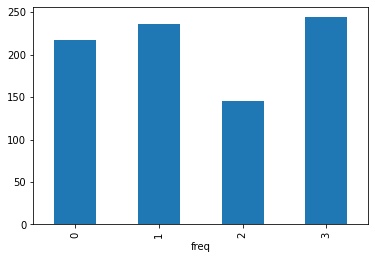

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# output the new frequency 
df = pd.DataFrame({'freq': train1_labels})
df.groupby('freq', as_index=False).size().plot(kind='bar')
plt.show()

Take a look at transformed labels. There should only by 0, 1,2 ,3. 

In [23]:

print(val_labels)

[3 3 1 3 1 2 2 3 0 2 1 2 1 0 3 3 1 1 0 1 1 0 3 0 1 1 1 1 3 0 3 3 0 1 3 0 0
 3 0 2 1 1 1 3 1 2 1 0 1 0 0 1 1 1 2 1 0 1 0 3 1 2 3 0 0 3 2 3 0 0 3 3 1 1
 3 1 0 3 3 0 1 0 1 3 1 1 0 2 1 3 0 1 3 1 1 0 0 3 1 1 0 2 0 1 1 3 0 0 1 2 0
 1 3 1 0 3 2 0 0 1 0 3 3 0 3 0 3 2 3 2 3 0 3 0 3 3 0 3 1 1 0 1 2 0 2 1 3 0
 3 0 1 3 0 3 3 1 0 2 2 1 2 0 2 3 0 3 0 1 3 3 3 0 3 1 0 1 1 1 1 0 0 1 1 2 1
 3 3 1 0 1 1 1 3 0 3 1 1 0 2 0 0 0 1 0 1 1 3 1 3 0 1]


In [24]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

import datetime
import numpy as np
import tensorflow as tf


from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

##### Create model
- https://www.tensorflow.org/tutorials/images/classification

In [25]:
num_classes = len(set(train_labels))

In [26]:
# AlexNet model
class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                        padding= 'valid', activation= 'relu',
                        input_shape= input_shape,
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None)) 

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(256, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        #drop out at 0.4  achieve 79% accuracy in prediction 
        #drop out at 0.5 achieve 73% accuracy in prediction 
        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.3))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.3))
        self.add(Dense(1000, activation= 'relu'))
        self.add(Dropout(0.3))
        self.add(Dense(num_classes, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.0001),
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                    metrics=['accuracy'])

In [27]:
model = AlexNet((200, 200, 6), num_classes)

In [28]:
model.summary()

Model: "alex_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 96)        69792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 256)       884

In [29]:
# some training parameters
EPOCHS = 10
image_height = 200
image_width = 200
train_dir = "train"
valid_dir = "validation"
model_dir = "my_model.h5"


In [30]:
# start training
history = model.fit(train1_images, train1_labels, epochs=10, 
                    validation_data=(val_images, val_labels))




Epoch 1/10
27/27 [==============================] - 74s 3s/step - loss: 1.4820 - accuracy: 0.3096 - val_loss: 1.2669 - val_accuracy: 0.3697
Epoch 2/10
27/27 [==============================] - 71s 3s/step - loss: 1.2044 - accuracy: 0.4733 - val_loss: 1.1371 - val_accuracy: 0.4834
Epoch 3/10
27/27 [==============================] - 72s 3s/step - loss: 1.0722 - accuracy: 0.5208 - val_loss: 1.0860 - val_accuracy: 0.4645
Epoch 4/10
27/27 [==============================] - 73s 3s/step - loss: 0.9143 - accuracy: 0.6109 - val_loss: 0.9937 - val_accuracy: 0.5498
Epoch 5/10
27/27 [==============================] - 72s 3s/step - loss: 0.8659 - accuracy: 0.6109 - val_loss: 1.0044 - val_accuracy: 0.6019
Epoch 6/10
27/27 [==============================] - 73s 3s/step - loss: 0.7583 - accuracy: 0.7034 - val_loss: 0.8828 - val_accuracy: 0.6730
Epoch 7/10
27/27 [==============================] - 70s 3s/step - loss: 0.5533 - accuracy: 0.7912 - val_loss: 0.9398 - val_accuracy: 0.6825
Epoch 8/10
27/27 [==

In [31]:
# make prediction
predicted_label = model.predict_classes(test_images)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [32]:
print(predicted_label)

[0 3 3 3 3 3 3 0 1 3 0 3 0 2 0 3 1 3 0 0 3 2 0 1 0 1 2 3 0 1 0 3 3 0 0 3 2
 0 0 3 3 0 1 3 3 0 0 3 1 3 3 0 0 3 1 3 0 3 3 3 0 3 3 0 0 3 0 3 1 3 0 3 1 3
 0 0 0 1 3 3 3 3 3 1 1 1 3 3 0 3 0 1 1 0 3 1 0 1 0 0 3 1 3 2 0 3 3 1 0 2 3
 0 3 2 3 3 3 3 3 1 3 3 3 3 1 0 0 0 3 3 1 0 0 0 3 0 1 3 0 0 0 1 1 0 1 0 3 1
 3 3 3 0 0 1 0 0 0 1 3 0 2 3 3 0 1 3 3 0 3 2 0 1 3 3 1 1 3 0 0 3 0 0 3 0 0
 0 3 0 1 3 0 0 1 3 3 0 2 0 1 3 3 3 1 3 3 3 0 3 0 0 3 0 0 1 1 1 0 1 0 3 2 0
 1 0 0]


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(test_labels, predicted_label))
print(classification_report(test_labels, predicted_label))

[[64  3  0  7]
 [13 40  1 10]
 [ 0  0  6  2]
 [ 4  0  4 71]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        74
           1       0.93      0.62      0.75        64
           2       0.55      0.75      0.63         8
           3       0.79      0.90      0.84        79

    accuracy                           0.80       225
   macro avg       0.76      0.78      0.76       225
weighted avg       0.82      0.80      0.80       225



##### Reason why accuracy doesn't further increase
1. imbalance of trianing set 
2. learning rate too large 

8/8 - 4s - loss: 0.6599 - accuracy: 0.8044


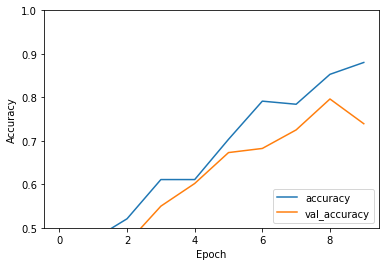

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)